# Classificateurs à arbres de décision : tutoriel sur les forêts aléatoires 
**Carnet 2 de 3**

Nous verrons dans ce tutoriel comment procède l’algorithme de forêt aléatoire pour faire des prédictions. Il s’agit du deuxième carnet de 3 sur les classificateurs à arbres de décision. Une forêt aléatoire est en fait un regroupement de plusieurs arbres de décision (sujet que vous devriez avoir abordé dans le Carnet 1 sur les arbres de décision, enfin nous l’espérons).

Nous utiliserons encore une fois dans ce **Carnet 2 sur les forêt aléatoires** les données relatives aux diverses classes d’iris et à leurs principales caractéristiques. Nous élargirons le modèle à arbre de décision au modèle de forêt aléatoire, c’est-à-dire un regroupement de plusieurs arbres de décision traitant différents blocs de données. Le modèle cumule les résultats de manière à formuler des prédictions plus précises.

Comme vous l’avez appris dans le carnet 1, les arbres de décision font des prédictions en séparant les données en groupes, en utilisant le paramètre de coefficient Gini pour générer une structure arborescente. En fournissant au modèle de nouvelles données d’entrée, les arbres de décision les situent dans le bon groupe, prédisant ainsi un résultat. Le modèle de forêt aléatoire comporte plusieurs arbres de décision assignés à différents blocs de données.   Cela est très utile car, comme vous le constaterez, le modèle de forêt aléatoire permet d’améliorer le degré de précision du classificateur à arbre de décision.

Nous verrons dans le Carnet 3 sur les forêts aléatoires et les données bruitées comment les classificateurs a forêt aléatoire parviennent à améliorer les prédictions malgré des jeux de données bruitées. Cela est fort utile puisque la plupart des jeux de données sont désordonnés et dotés d’une structure imparfaite, à l’image du phénomène réel qu’ils souhaitent représenter.



# Les objectifs d’apprentissage
Durée moyenne d’exécution : 30 minutes

À la fin de ce tutoriel, vous devriez être en mesure :
* D’épurer vos données et de décrire en quoi cela est important pour l’apprentissage machine.
* De combler les données manquantes, si nécessaire.
* De visualiser et d’analyser les données pour pouvoir vérifier leur intégrité.
* De générer un classificateur à forêt aléatoire.
* D’utiliser le classificateur à forêt aléatoire pour faire des prédictions.
* De visualiser dans quelle mesure le modèle de forêt aléatoire parvient à distinguer les classes d’iris en fonction des limites de décision, comme nous l’avons fait pour le classificateur à arbre de décision. 


## What you will need for this tutorial

* Consultez le [document d'introduction](https://uottawa-it-research-teaching.github.io/machinelearning/) pour connaître les exigences générales et le fonctionnement des carnets Jupyter.
* Nous aurons aussi besoin de Pandas pour faciliter la gestion des données. C’est un outil Python très puissant, capable de lire les fichiers CSV et Excel. Il offre aussi d’excellentes capacités de manipulation de données, ce qui est très utile pour l’épuration des données.
* Nous utiliserons scikit-learn aux fins d’apprentissage-machine. Scikit-learn propose des outils d’exploration et d’analyse de données simples mais efficaces.  
* Numpy : fournit le soutien nécessaire à la gestion de vastes matrices et de tableaux multidimensionnels.
* Seaborn : propose une interface intuitive et plaisante de génération de représentations graphiques statistiques, attrayantes et instructives. 
* Matplotlib : permet de générer des diagrammes et des tracés.
* Requests : gère les demandes et réponses http lors du téléchargement de jeux de données ou de modèles préalablement entrainés. 
* Ipywidgets : permet de créer des tracés, graphiques et autres outils de visualisation interactifs, et de contrôler l’exécution de codes.   
* Les fichiers de données normalement associés au présent carnet.


## Les meilleures pratiques en termes de gestion des données de recherche (GDR)

Une bonne manipulation des données destinées à l’apprentissage-machine commence par une gestion efficace des données de recherche (GDR). Comme vous l’avez fait dans les tutoriels précédents, n’oubliez pas :
* D’ENREGISTREZ VOS DONNÉES BRUTES DANS LEUR FORMAT ORIGINAL
* DE SAUVEGARDEZ VOS DONNÉES (règle du 3-2-1)

Nous poursuivrons la même démarche dans le Carnet 2 sur les forêts aléatoires : 

DÉCRIVEZ VOS DONNÉES

* Adaptées aux machines : décrivez vos données en fonction d’une norme de métadonnées de découverte. 
* Conviviales : décrivez vos variables afin que vos collègues comprennent ce que vous voulez dire. Des données non associées à des métadonnées de qualité ne sont d’aucune utilité. Assignez des noms clairs à vos variables.
* Ne laissez pas de cellules vides – utilisez des valeurs numériques nettement hors des plages pour définir les données manquantes (p. ex., « 99999 ») ou non applicables (p. ex., « 88888 ») et décrivez-les dans votre glossaire de données.
* Convertissez vos données en formats ouverts non exclusifs.  
* Nommez vos données de façon claire à l’aide de noms de fichiers utilisant des métadonnées de base.  


## Épurez vos données

Tout comme pour l’épuration des données faite dans le premier tutorial sur l’apprentissage-machine, nous utiliserons la bibliothèque Pandas pour épurer nos données.

Nous avons procédé à une épuration et une analyse détaillée du jeu de données dans le Carnet 1 sur les arbres de décision. Nous nous contenterons donc ici d’un aperçu superficiel pour vérifier l’intégrité des données avec lesquelles nous travaillerons. Nous assignerons un nom plus court aux variables du jeu de données pour faciliter l’encodage.

In [1]:
# Vous devrez peut-être installer les bibliothèques selon le lieu d’exécution du code.
# Vous pouvez vérifier l’installation des bibliothèques en exécutant !pip List dans une cellule.
# !pip install sklearn numpy pandas seaborn matplotlib requièrent ipywidgets

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import roc_auc_score
from sklearn import datasets
import warnings;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

Nous utilisons le même jeu de données sur les iris que pour le Carnet 1 sur les arbres à décision. Nous souhaitons prédire à quelle espèce appartient un iris en fournissant au modèle des mesures relatives aux *sépales* et aux *pétales*. Du point de vue de l’algorithme d’apprentissage-machine, l’espèce correspond à la classe d’appartenance des données.


#### Données relatives aux iris

La première étape d’épuration des données consiste à lire les données ! Vous devriez avoir à votre disposition la fonction « data.csv » qui est normalement inclue dans le présent carnet. En cas contraire, vous pouvez la télécharger via le lien ci-dessous.

PD : veuillez renommer vos fichiers de données avec des noms plus descriptifs qui respectent les meilleures règles d’affectation de noms.

In [3]:
iris = pd.read_csv('./iris_flower_feature_measurements.csv')

Comme nous ne voulons pour l’instant qu’un bref aperçu des données, nous pouvons nous contenter d’examiner seulement les cinq premières lignes de données.

In [4]:
iris.head(5)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Tel que noté dans le Carnet 1 sur les arbres de décision, les intitulés des colonnes sont faciles à comprendre et respectent les meilleures pratiques de gestion des données de recherche. La documentation limpide des diverses variables, en tout point conforme au processus de collecte de données, facilite la réutilisation de ces données.

Selon le résumé du Référentiel d’apprentissage-machine UCI, ces colonnes de données contiennent les mesures prises sur différentes iris, à l’origine des données recueillies.
* Les valeurs *non nulles* correspondent aux fleurs mesurées et classées en fonction de leur espèce.
* Les valeurs *float64* réfèrent à la double précision à virgule flottante sur 64 bits, signifiant la capacité de gérer de très grands ou très petits nombres.
* Les valeurs *object* indiquent que la variable contient des données catégorielles ou textuelles plutôt que numériques.

Vous remarquerez que nous avons 150 entrées (une par fleur d’iris) et 150 valeurs non nulles pour les mesures, donc aucune donnée manquante !

Les données utilisées pour les mesures sont toutes numériques et du même type (float64).

Cela est crucial puisque l’exécution de fonctions mathématiques ne peut se faire qu’à partir de données numériques. L’espèce est quant à elle de nature textuelle, comme prévu.

Notez bien que les données manquantes sont monnaies courantes pour les jeux de données brutes. 

Fort heureusement, nous n’avons pas à gérer la problématique de données manquantes. La visualisation est un outil efficace de vérification des données car un simple coup d’œil permet de déceler les problèmes d’intégrité des données susceptibles d’affecter l’exactitude du modèle de prédiction.

Il faut cependant être en mesure de bien comprendre les données avec lesquelles vous travaillez. Si visualiser des jeux de données complexes peut parfois être ardu et leur interprétation requérir une certaine expertise en la matière, la visualisation est précieuse car elle offre des informations utiles avant d’entreprendre le développement d’un modèle d’apprentissage-machine.

Ici nous mesurons la longueur et la largeur des pétales et des sépales. Aucune expertise n’est donc requise ! Procédons alors au traçage de certaines données.

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Nombre d’occurrences dans chaque classe
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Analysons maintenant les données. Les 150 lignes de notre jeu de données sont réparties en 3 segments distincts de 50 lignes ce qui confirme une distribution uniforme des données selon l’espèce.

L’application Pandas offre plusieurs fonctions utiles pour l’exploration des données. La fonction « pairplot() » génère une visualisation Pairplot  en traçant un graphique des points de données pour déterminer la relation entre ces points, à savoir continue ou catégorique. Cette *visualisation exploratoire des données* nous permet d’identifier l’ensemble optimal de caractéristiques favorisant la formation de grappes distinctes au sein du modèle d’arbre décisionnel et par extension du plus grand modèle à forêt aléatoire.

Il sera avantageux de procéder à une analyse « pairplot » même si nous l’avons déjà fait dans le Carnet 1. Nos constatations pourront nous aider à comprendre encore mieux les caractéristiques et améliorer la validation de nos résultats.

La fonction « pairplot() » génère une visualisation Pairplot  en traçant un graphique des points de données pour déterminer la relation entre ces points, à savoir continue ou catégorique. Cette visualisation exploratoire des données nous permet d’identifier l’ensemble optimal de caractéristiques favorisant la formation de grappes distinctes au sein du modèle d’arbre décisionnel.


<Axes: xlabel='species', ylabel='count'>

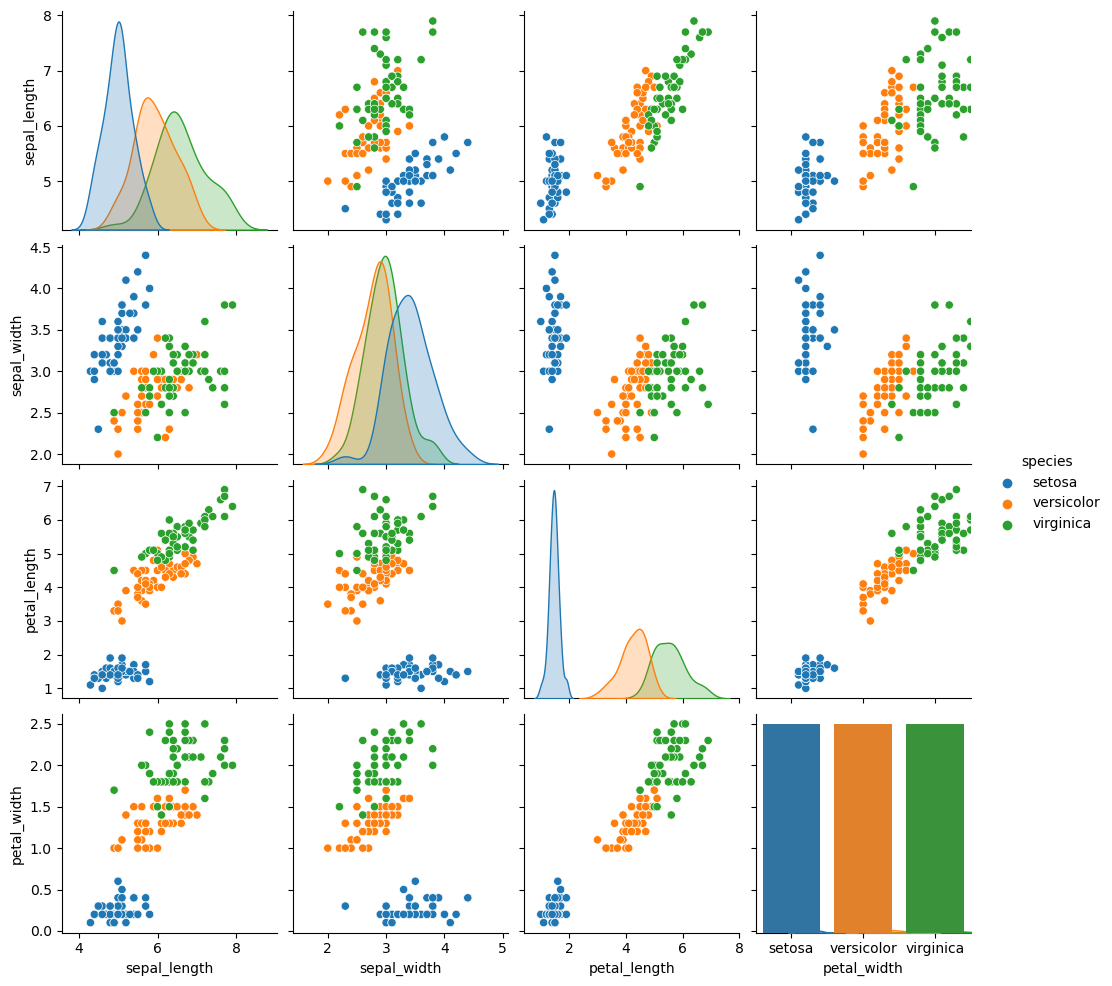

In [7]:
sns.pairplot(iris,hue='species')

sns.countplot(x = 'species', data = iris)

Nous avons, dans le Carnet 1 sur les arbres de décision, examiné les résultats d’un tracé « pairplot » et constaté que l’espèce **satosa** se démarquait nettement des autres espèces.  C’est donc l’espèce que la forêt aléatoire pourra prédire le plus facilement.

L’analyse des tracés de paires met en évidence un concept non abordé jusqu’à date, soit l’importance des caractéristiques. Il est crucial de bien saisir l’importance des caractéristiques pour les classificateurs à forêt aléatoire car elle renseigne le choix des caractéristiques qui seront intégrées au modèle et pourra soutenir les initiatives d’application technique des caractéristiques, un domaine lié à leur optimisation, et ainsi améliorer le rendement du modèle.
 
Les espèces virginica et versicolore présentent certains chevauchements, notamment au niveau de la représentation graphique des mesures de sépales. Mais dans quelle mesure l’algorithme de l’arbre de décision aura-t-il de la difficulté à établir une distinction entre ces deux espèces ? Les graphiques nous indiquent aussi que l’inclusion des mesures des pétales fournit suffisamment de renseignements pour que l’algorithme puisse différencier les espèces virginica et versicolore.

Tel que mentionné en introduction, nous souhaitons améliorer la précision et la capacité du modèle à prédire la classe à laquelle un iris appartient en fonction des mesures des sépales et des pétales.  Préparons le classificateur à forêt aléatoire.  

### Utilisation d’un classificateur à forêt aléatoire

Maintenant que nous connaissons la structure du jeu de données et le potentiel d’erreur d’un classificateur à forêt aléatoire, nous devons déterminer nos variables pour les données d’entrainement et les données d’essais.

Pour les données d’entrainement, nous avons :
  - Variables X (données d’entrée du modèle) : sepal_length, sepal_width, petal_length, petal_width<br>
  - Variable Y (donnée de sortie du modèle) : species

Pour les données d’essais nous avons : 
  - Variables X (données d’entrée du modèle) : sepal_length, sepal_width, petal_length, petal_width<br>
  - Variable Y (donnée de sortie du modèle) : species


In [8]:
train, test = train_test_split(iris, test_size = 0.3, stratify = iris['species'], random_state = 1)
# Développement du modèle - entrainement
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species

# Développement du modèle - essais
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [9]:
#Importer le classificateur à forêt aléatoire à partir de sklearn.ensemble
clf=RandomForestClassifier(n_estimators=10)

Les classificateurs à forêt aléatoire comportent plusieurs arbres de décision assignés à différents blocs de données. Le modèle cumule les résultats de manière à formuler des prédictions plus précises. En d’autres termes, la donnée de sortie d’une forêt aléatoire correspond à la classe sélectionnée par le plus haut nombre d’arbres de décision constituant la forêt aléatoire. Le nombre « d’estimateurs » correspond au nombre d’arbres de décision que nous souhaitons que le modèle de forêt aléatoire utilise pour faire des prédictions. 

Établissons maintenant notre classificateur à forêt aléatoire en utilisant les variables d’entraînement ci-dessus : x_train et y_train. 

Notre classificateur à forêt aléatoire comportera 10 estimateurs.

In [10]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [11]:
y_pred=clf.predict(X_test)

Ajoutez au tableau les mesures de la longueur des sépales (sepal_length), de la largeur des sépales (sepal_width), de la longueur des pétales (petal_length) et de la largeur des pétales (petal_width) pour mettre les prédictions à l’essai !

In [12]:
iris_species_index = clf.predict([[6.7,3.0,5.2,2.3]])[0]
print(iris_species_index)

virginica


In [13]:
print("Accuracy:","{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
# print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

Accuracy: 0.978


Près de 98 % de précision. C’est une nette amélioration par rapport au classificateur à arbre de décision, surtout compte tenu de la taille relative et des caractéristiques du jeu de données.
 
Nous avons généré dans le Carnet 1 sur les arbres à décision un modèle de prédiction pour le jeu de données sur les iris qui a affiché une précision de 93,3 %. Mais en combinant plusieurs arbres de décision dans un classificateur à forêt aléatoire, nous parvenons à améliorer le niveau de précision du modèle pour atteindre 98 %.


## Comprendre le fonctionnement d’une forêt aléatoire

##### Importance des caractéristiques

L’importance des caractéristiques relève de techniques de gradation des caractéristiques en fonction de leur capacité à faire des prédictions finales justes. Dans notre jeu de données, les caractéristiques des iris sont la longueur et la largeur des sépales et des pétales.

Dans les arbres de décision, les caractéristiques représentent les variables ou attributs utilisés par l’arbre pour faire des prédictions. Voici certains éléments fondamentaux :
* Les caractéristiques correspondent aux colonnes de données d’entrée qu’analyse l’arbre pour déduire des règles et procéder à la classification. Ces points de données peuvent être catégoriques ou continus.   
* À chaque nœud de l’arbre, l’algorithme sélectionne la caractéristique qui permet de répartir de manière optimale les données en classes cibles distinctes. C’est le fondement des règles d’arborescence. 
* Les caractéristiques qui génèrent des nœuds près du sommet de l’arbre interviennent en premier dans les prédictions et ont donc plus d’importance.
* L’importance des caractéristiques relève de techniques de mesure de l’utilité de chaque caractéristique dans la construction du modèle à arbre de décision.
* L’importance des caractéristiques est fondée sur des paramètres tels que l’impureté du coefficient Gini, l’apport d’informations et la diminution de la variance au sein de l’arbre à décision.
* Les caractéristiques situées plus haut dans l’arbre de décision et qui sont à l’origine des premières divisions ont plus d’importance. 
* Les caractéristiques les plus importantes aident le modèle à arbre de décision à prédire la variable cible avec plus de précision.  
* L’importance des caractéristiques facilite la sélection des caractéristiques, élimine les caractéristiques non pertinentes et nous permet de mieux comprendre quelles caractéristiques guident le processus décisionnel.

Le modèle de prédiction de type forêt aléatoire étant de nature statistique, il est possible d’évaluer l’importance et le poids de chaque propriété ou caractéristique mesurable des iris représentées dans le jeu de données. On mesure l’importance des caractéristiques en fonction de la diminution de la précision d’un arbre de décision et de l’absence d’une caractéristique lors de la division. Le rendement (et donc la précision) diminue si l’on omet des caractéristiques plus déterminantes. Ce processus est repris pour tous les arbres de décision (estimateurs) qui constituent la forêt. Une mesure moyenne de la diminution de la précision pour l’ensemble des arbres est alors assignée à chaque caractéristique sous forme « d’importance ».

Sous sklearn, les classificateurs sont dotés d’une fonction intégrée « feature_importance » qui permet d’évaluer l’importance de leurs caractéristiques. Réglons cette fonction avant de tracer l’importance des diverses caractéristiques. 

In [14]:
iris.drop('species', axis=1)
iris.feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris.species_names = ['setosa', 'versicolor', 'virginica']
input_parameters = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

Voyons de quoi cela a l’air en traçant un diagramme à barres pour chaque caractéristique en fonction de son importance relative.

Text(0, 0.5, 'Input Parameters')

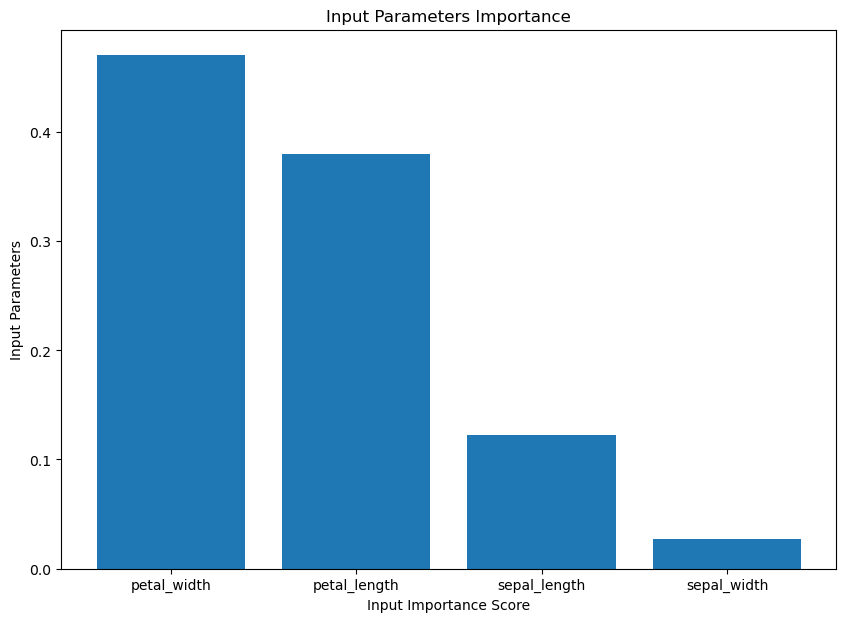

In [15]:
#Importer matplotlib.pyplot en tant que plt
plt.rcParams['figure.figsize'] = [10, 7]

plt.bar(input_parameters.index,input_parameters.values)
plt.title('Input Parameters Importance')
plt.xlabel('Input Importance Score')
plt.ylabel('Input Parameters')

Comme nous l’avons constaté dans le Carnet 1 sur les arbres de décision, ce sont les mesures des pétales qui important davantage pour prédire l’espèce. 

Le classificateur à forêt aléatoire dont nous nous servons est doté d’un paramètre très utile intitulé *feature_importance*, illustré dans le diagramme à barres ci-dessus. Nous constatons que les caractéristiques des pétales sont, et de loin, les plus utiles. Mais plus important encore, il y a une différence notoire entre la longueur et la largeur des pétales.

##### Surajustement : que se passe-t-il si le modèle se comporte de manière erratique ?
Il est parfois utile de visualiser l’ensemble des arbres de décision (estimateurs) qui constituent le modèle à forêt aléatoire afin de déterminer l’homogénéité des décisions prises par les estimateurs en examinant de plus près le coefficient Gini. Chaque estimateur traite un sous-échantillon du jeu de données. Le classificateur à forêt aléatoire utilise la moyenne de l’ensemble des estimateurs pour gérer le « surajustement » et supprimer tout bruit présent au sein du jeu de données. Le surajustement survient lorsqu’un modèle d’apprentissage-machine formule des prédictions exactes à partir de données d’entrainement mais pas à partir de nouvelles données. Nous pouvons dans pareil cas envisager d’ajuster les paramètres du classificateur à forêt aléatoire. Cela inclut réduire la profondeur maximale de l’arbre, accroitre le nombre minimal d’échantillons requis pour la division d’un nœud interne, augmenter le nombre minimal d’échantillons requis au niveau d’une nœud-feuille, ou réduire le nombre d’estimateurs au sein de l’ensemble. Nous pourrions aussi conclure, selon les circonstances, qu’un autre classificateur serait plus approprié pour ajuster les données.

Le code ci-après affiche deux (2) estimateurs de notre classificateur à forêt aléatoire.

In [23]:
clf = dict()
#clf['Decision Tree'] = tree.DecisionTreeClassifier(criterion='entropy', splitter='best').fit(X_train,y_train)
clf['Random Forest'] = ensemble.RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train,y_train)

fn=iris.feature_names
cn=iris.species_names
fig, axes = plt.subplots(nrows = 2,ncols = 1,figsize = (9,10), dpi=2900)
for index in range(0, 2):
  tree.plot_tree(clf['Random Forest'].estimators_[index],
               feature_names = fn, 
               class_names=cn,
               filled = True,
               ax = axes[index]);
  axes[index].set_title('Estimator: ' + str(index), fontsize = 14)

Pouvoir visualiser certains des estimateurs d’arbres à décision au sein de la forêt aléatoire permet de comprendre la logique de chaque arbre et l’importance des caractéristiques, et donc de mieux comprendre le processus global de prise de décisions. D’autre part, les tracés des limites illustrent les limites de décision de l’ensemble de la forêt aléatoire, montrant de quelle façon le modèle répartit les différentes classes dans l’espace des attributs

Comme nous l’avons vu dans le Carnet 1 sur les arbres de décision, le tracé des limites de décision illustre visuellement la ou les limites utilisées par un classificateur pour répartir les classes dans un espace multidimensionnel. C’est un outil très pratique pour interpréter et évaluer les modèles de classification. La surface multicolore permet de répartir deux classes ou plus en ensembles distincts, tous les points associés à une classe donnée se retrouvant sur un côté de la limite de décision. Ces limites nous aident à déterminer si le modèle parvient à généraliser de manière appropriée les données d’entrainement. Des limites uniformes témoignent d’une meilleure généralisation. Les limites non intuitives ou irrégulières signalent des zones du modèle à améliorer. À titre d’exemple, la zone bleue représentant l’espèce virginica est divisée en deux, ce qui est tout à fait inattendu.

L’effet de « moyennage » de la forêt aléatoire contribuera à adoucir les limites en raison d’une meilleure généralisation face à de nouvelles données et donc à atténuer le surajustement. Nous le constatons par les points de données d’essai regroupés dans une seule zone colorée, contrairement à la zone bleue divisée de l’espèce virginica dans le Carnet 1. Cela signifie que les classes sont plus clairement définies dans le modèle à forêt aléatoire que dans le modèle à arbre de décision. 

Le code de tracé ci-dessous illustre les limites de décision pour chaque classe (3 sections) identifiée par le modèle entrainé, où chaque point d’essai se retrouve dans l’espace de la limite de décision en fonction du rapport entre la longueur et la largeur d’un pétale donné.
 - Cette section du code illustre les limites ombrées selon les espèces : setosa (en rouge), versicolore (en jaune) et virginica (en bleu).

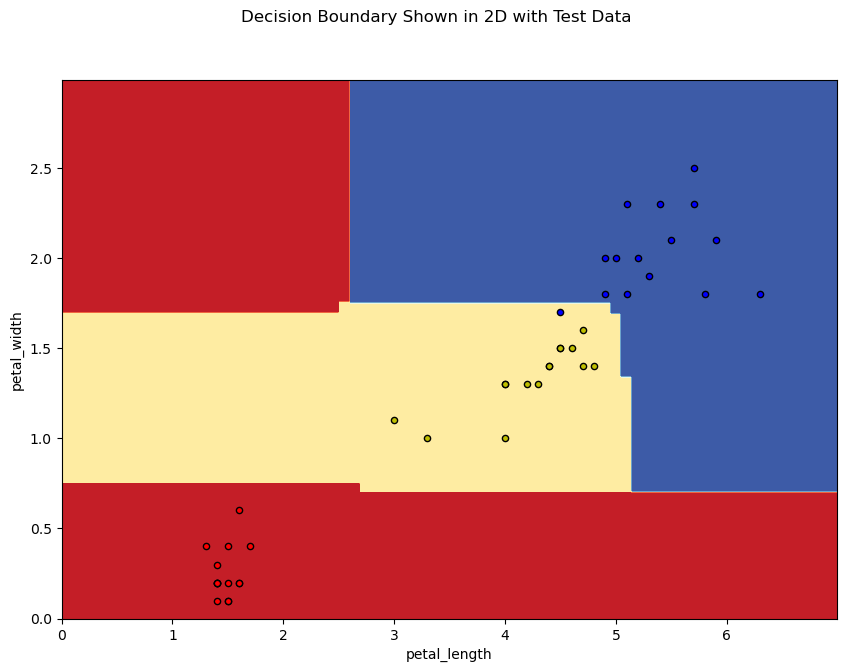

In [24]:
# Tracer la limite pour la largeur v. la longueur des pétales 
cn = ['setosa', 'versicolor', 'virginica']
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = RandomForestClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# Tracer les points de données d'essais
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

Analyser les limites de décision est une excellente façon de découvrir comment les données d’entrainement que nous avons sélectionnées affectent la performance (précision et sensibilité) de notre modèle ainsi que sa capacité de généralisation et de prédiction face à de nouvelles données.   Visualiser les limites de décision nous permet de voir comment les modèles réagissent devant chaque jeu de données. C’est une excellente façon de comprendre le fonctionnement d’algorithmes spécifiques et de constater leurs limites face à des jeux de données précis.

Dans ce cas-ci, la plupart des points de données correspondent bien à leurs limites puisque, comme nous pouvons le voir, chaque couleur ne divise plus les données. Cela est à l’opposé des résultats tenus dans le Carnet 1, alors que la classe bleue était divisée en deux, chaque section comportant des points de données. L’amélioration offerte par le modèle à forêt aléatoire est liée à la capacité accrue de tracer ces limites et au fait que celles-ci n’ont pas besoin d’être tracées de manière aussi fine pour assurer le bon fonctionnement du classificateur. 

**Résumé**<br>
Nous avons utilisé dans ce tutoriel narratif et interactif sur les classificateurs à forêt aléatoire un jeu de données sur les iris souvent utilisé pour traiter de code et des différents types de visualisation, et fournir diverses explications.

En résumé, nous avons accompli les tâches suivantes :
* Importer les bibliothèques nécessaires au tutoriel.
* Charger et vérifier le jeu de données sur les iris à l’aide de diverses fonctions tells que groupby(), head(), pairplot(), etc.
* Diviser le jeu de données en un jeu d’entrainement et un jeu d’essais.
* Créer un exemple de classificateur à arbre de décision.
* Entrainer le classificateur par forât aléatoire à l’aide des données d’entrainement.
* Évaluer la capacité du modèle à faire des prédictions à partir de nouvelles données.
* Visualiser le classificateur à forêt aléatoire entrainé sous forme d’arbre et de limites de décision. Nous en avons fait l’interprétation et avons discuté des règles applicables à de tels classificateurs.
* Constater qu’un classificateur à forêt aléatoire performe mieux qu’un classificateur à arbre de décision en termes de classification de données.


## Veuillez passer au Carnet 3